K-MEANS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/MLB-LAB/Dataset/mall.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
x=data.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

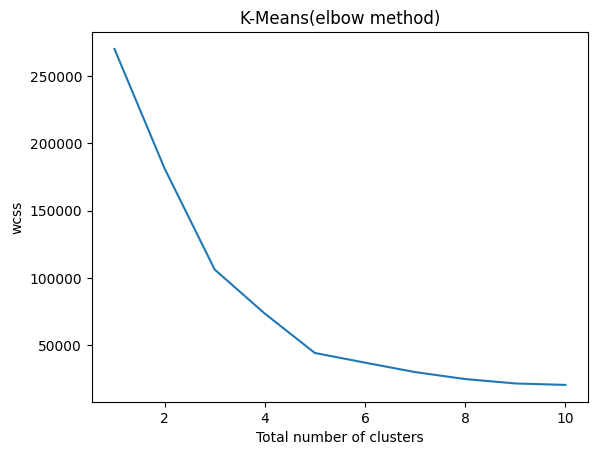

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('K-Means(elbow method)')
plt.xlabel("Total number of clusters")
plt.ylabel("wcss")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [ ]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

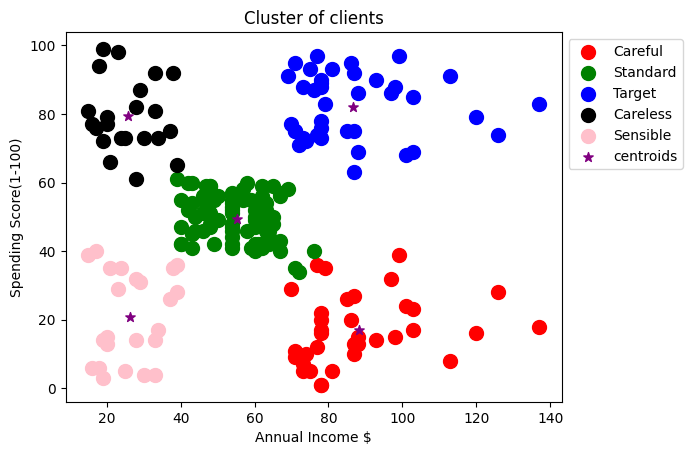

In [ ]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Careful')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='green',label='Standard')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='blue',label='Target')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='black',label='Careless')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='pink',label='Sensible')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='purple',label='centroids',marker='*')
plt.title("Cluster of clients")
plt.xlabel('Annual Income $')
plt.ylabel("Spending Score(1-100)")
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.show()

Predicting the number of clusters Silhouette Method-Mall Dataset

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
n_clusters_range = range(2, 11)
silhouette_scores = []
for i in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

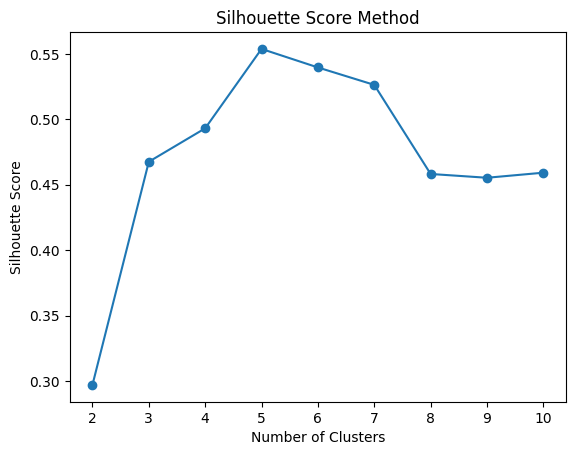

In [ ]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
optimal_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]

In [ ]:
optimal_n_clusters

5

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

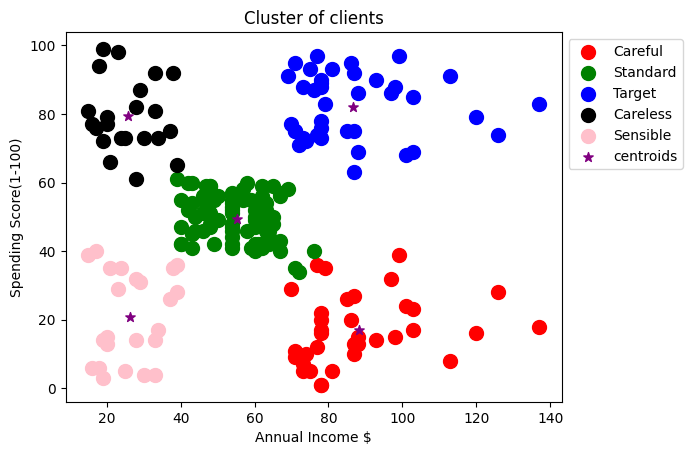

In [ ]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Careful')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='green',label='Standard')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='blue',label='Target')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='black',label='Careless')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='pink',label='Sensible')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='purple',label='centroids',marker='*')
plt.title("Cluster of clients")
plt.xlabel('Annual Income $')
plt.ylabel("Spending Score(1-100)")
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.show()

Predicting the number of clusters Gap-Stat-> Mall Dataset

In [ ]:
x = x.astype(float)

In [ ]:
pip install gap-stat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=043af1053cfa5378cee92a2c24c670b8abbd130f77d1faefa8ab5dec2fd45cda
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


In [ ]:
from gap_statistic import OptimalK

In [ ]:
cluster_range=range(1,11)
optimal_k=OptimalK(parallel_backend='joblib')
n_clusters = optimal_k(x, cluster_array=cluster_range)

print("Optimal clusters:", n_clusters)


Optimal clusters: 7


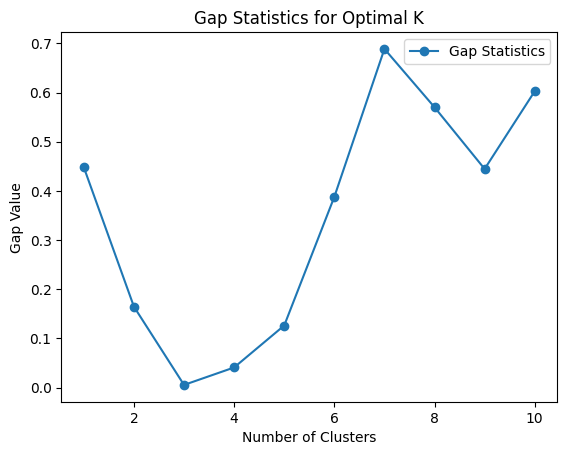

In [ ]:
plt.plot(cluster_range, optimal_k.gap_df.gap_value, marker='o', label='Gap Statistics')
plt.xlabel('Number of Clusters')
plt.ylabel('Gap Value')
plt.title('Gap Statistics for Optimal K')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

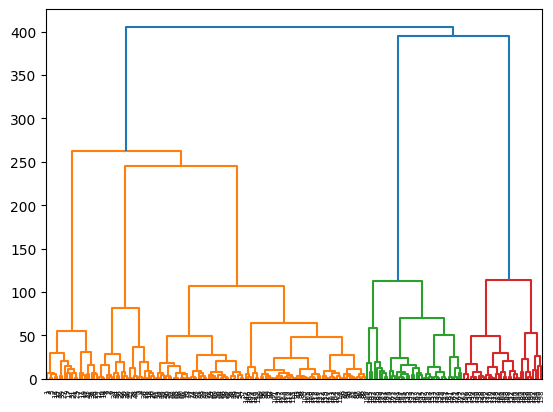

In [ ]:
linkage_data = linkage(x,method='ward',metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [ ]:
hierarchial_clustering = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_pred = hierarchial_clustering.fit_predict(x)

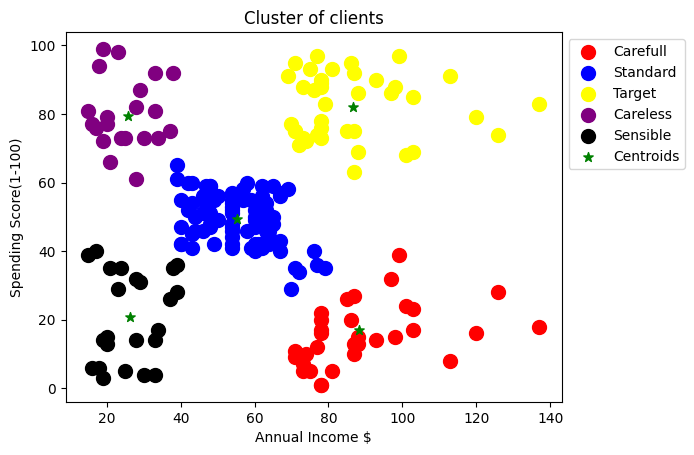

In [ ]:
plt.scatter(x[y_pred==0,0],x[y_pred == 0,1],s=100,c='red',label='Carefull')
plt.scatter(x[y_pred==1,0],x[y_pred == 1,1],s=100,c='blue',label='Standard')
plt.scatter(x[y_pred==2,0],x[y_pred == 2,1],s=100,c='yellow',label='Target')
plt.scatter(x[y_pred==3,0],x[y_pred == 3,1],s=100,c='purple',label='Careless')
plt.scatter(x[y_pred==4,0],x[y_pred == 4,1],s=100,c='black',label='Sensible')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='green',label='Centroids',marker='*')
plt.title("Cluster of clients")
plt.xlabel('Annual Income $')
plt.ylabel("Spending Score(1-100)")
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.show()

MP-NET

In [ ]:
x1=[int(x) for x in input("Enter values for x1(separated by space): ").split()]
x2=[int(x) for x in input("Enter values for x1(separated by space): ").split()]
w = [int(w) for w in input("Enter values for weights w1 and w2 (separated by space): ").split()]

Enter values for x1(separated by space): 1 1 0 0
Enter values for x1(separated by space): 1 0 1 0
Enter values for weights w1 and w2 (separated by space): 1 1


AND_GATE

In [ ]:
and_gate=[]
for i in range(len(x1)):
  and_gate.append(x1[i]*w[0]+x2[i]*w[1])
print(" x1 x2 yin   y")

for i in range(len(and_gate)):
  print(f' {x1[i]}   {x2[i]}   {and_gate[i]}   {1 if and_gate[i]>1 else 0}')

 x1 x2 yin   y
 1   1   2   1
 1   0   1   0
 0   1   1   0
 0   0   0   0


OR_GATE

In [ ]:
or_gate=[]
for i in range(len(x1)):
  or_gate.append(x1[i]*w[0]+x2[i]*w[1])
print(" x1 x2 yin   y")

for i in range(len(or_gate)):
  print(f' {x1[i]}   {x2[i]}   {or_gate[i]}   {1 if or_gate[i]>0 else 0}')

 x1 x2 yin   y
 1   1   2   1
 1   0   1   1
 0   1   1   1
 0   0   0   0


NAND_GATE

In [ ]:
nand_gate=[]
for i in range(len(x1)):
  nand_gate.append(x1[i]*w[0]+x2[i]*w[1])
print(" x1 x2 yin   y")

for i in range(len(nand_gate)):
  print(f' {x1[i]}   {x2[i]}   {nand_gate[i]}   {1 if nand_gate[i]<=1 else 0}')

 x1 x2 yin   y
 1   1   2   0
 1   0   1   1
 0   1   1   1
 0   0   0   1


NOR_GATE

In [ ]:
nor_gate=[]
for i in range(len(x1)):
  nor_gate.append(x1[i]*w[0]+x2[i]*w[1])
print(" x1 x2 yin   y")

for i in range(len(nor_gate)):
  print(f' {x1[i]}   {x2[i]}   {nor_gate[i]}   {1 if nor_gate[i]<=0 else 0}')

 x1 x2 yin   y
 1   1   2   0
 1   0   1   0
 0   1   1   0
 0   0   0   1


NOT_GATE

In [ ]:
x1 = [0, 1]
w = [1]

not_gate = []

for i in range(len(x1)):
    not_gate.append(x1[i] * w[0])
print('x   yin   y')

for i in range(len(not_gate)):
  print(f'{x1[i]}    {not_gate[i]}   {1 if not_gate[i]==0 else 0}')

x   yin   y
0    0   1
1    1   0


Single layer perceptron

In [ ]:
def y_input(x1,x2,w1,w2,b):
  yin=(x1*w1)+(x2*w2)+b
  return yin

In [ ]:
def activation_function(inp,theta):
  if inp>=theta:
    return 1
  else:
    return -1

In [ ]:
def weight_update(X1,X2,t):
  w1=w2=b=0
  alpha=theta=1
  for i in range(len(x1)):
    target=t[i]
    y=activation_function(y_input(x1[i],x2[i],w1,w2,b),theta)

    while y!=target:
      w1=w1+(alpha*target*X1[i])
      w2=w2+(alpha*target*X2[i])
      b=b+(alpha*target)
      y=activation_function(y_input(X1[i],X2[i],w1,w2,b),theta)
  print(f'Final Weights: w1={w1}  w2={w2}  b={b}')

AND_GATE

In [ ]:
X1 = [1,1,-1,-1]
X2 = [1,-1,1,-1]
t =  [1,-1,-1,-1]
weight_update(X1,X2,t)

Final Weights: w1=1  w2=1  b=-1


OR_GATE

In [ ]:
x1 = [1,1,-1,-1]
x2 = [1,-1,1,-1]
t =  [1,1,1,-1]
weight_update(x1,x2,t)

Final Weights: w1=1  w2=1  b=1


NAND_GATE

In [ ]:
x1 = [1,1,-1,-1]
x2 = [1,-1,1,-1]
t =  [-1,1,1,1]
weight_update(x1,x2,t)

Final Weights: w1=0  w2=0  b=2


NOR_GATE

In [ ]:
x1 = [1,1,-1,-1]
x2 = [1,-1,1,-1]
t =  [-1,-1,-1,1]
weight_update(x1,x2,t)

Final Weights: w1=-1  w2=-1  b=1


NOT_GATE

In [ ]:
x1 = [1,-1]
x2 = [1,-1]
t =  [-1,1]
weight_update(x1,x2,t)

Final Weights: w1=-1  w2=-1  b=1


**ANN**

In [ ]:
import numpy as np #importing the libraries(step-2)
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
ann_dataset =pd.read_csv("/content/drive/MyDrive/MLB-LAB/Dataset/Social_Network_Ads.csv") #importing the dataset(step-3)
ann_data=ann_dataset
ann_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
X=ann_data.iloc[:,1:4].values
X

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [ ]:
Y=ann_data.iloc[:,4].values
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X[:,0]=encoder.fit_transform(X[:,0])
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier=Sequential()

In [ ]:
classifier.add(Dense(units=2, kernel_initializer='uniform', activation='relu',input_dim=3))

In [ ]:
classifier.add(Dense(units=2, kernel_initializer='uniform', activation='relu'))

In [ ]:
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.fit(X_train,Y_train,batch_size=10,epochs=10)

Epoch 1/10
30/30 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.6233
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.6300
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.6300
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.6300
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6300
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.6300
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6300
Epoch 8/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6300
Epoch 9/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6243 - accuracy: 0.6300
Epoch 10/10
30/30 [==============================] - 0s 2ms/step - loss: 0.6041 - accuracy: 0.6300


In [ ]:
Y_pred=classifier.predict(X_test)
Y_pred

4/4 [==============================] - 0s 3ms/step


array([[0.3612676 ],
       [0.36892122],
       [0.3734689 ],
       [0.3597328 ],
       [0.35690847],
       [0.29752672],
       [0.31487584],
       [0.46200472],
       [0.30536538],
       [0.39895684],
       [0.32998198],
       [0.33336598],
       [0.3620289 ],
       [0.39928314],
       [0.3196645 ],
       [0.42344317],
       [0.38766447],
       [0.3151732 ],
       [0.46200472],
       [0.32877654],
       [0.35456422],
       [0.46200472],
       [0.38455802],
       [0.46086   ],
       [0.29490942],
       [0.46200472],
       [0.35914707],
       [0.34980625],
       [0.37656045],
       [0.38049185],
       [0.32493696],
       [0.39040634],
       [0.45195547],
       [0.36045542],
       [0.31399646],
       [0.28784397],
       [0.32350257],
       [0.3475118 ],
       [0.32901567],
       [0.41047174],
       [0.3481333 ],
       [0.37660953],
       [0.3517299 ],
       [0.32727346],
       [0.46047524],
       [0.33179188],
       [0.4012282 ],
       [0.461

In [ ]:
Y_pred=Y_pred>0.45 #greater than 0.45 is true else false
Y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[67,  1],
       [13, 19]])

In [ ]:
from sklearn import metrics
prediction=metrics.accuracy_score(Y_test,Y_pred)
print("accuracy:",prediction *100,"%")

accuracy: 86.0 %


SVM

In [ ]:
X=ann_data.iloc[:,2:4].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [ ]:
Y=ann_data.iloc[:,4].values
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear') #'rbf', 'poly', 'precomputed', 'sigmoid'-> non linear
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
Y_pred=classifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_pred,Y_test)
cm


array([[66,  8],
       [ 2, 24]])

In [ ]:
from sklearn import metrics
prediction=metrics.accuracy_score(Y_test,Y_pred)
print(f"Linear SVM Accuracy: ",prediction*100,"%")

Linear SVM Accuracy:  90.0 %
